In [46]:
### QUESTION 1

import random as rnd
import math

def get_spike_train(rate,big_t,tau_ref):

    if 1<=rate*tau_ref:
        print("firing rate not possible given refractory period f/p")
        return []

    exp_rate=rate/(1-tau_ref*rate)

    spike_train=[]

    t=rnd.expovariate(exp_rate)

    while t< big_t:
        spike_train.append(t)
        t+=tau_ref+rnd.expovariate(exp_rate)

    return spike_train


def calculate_fano(spike_train, count_window):
    
    spike_counts = []
    spike_index = 0

    for i in range(1, int(1000/count_window)):
        count = 0
        while spike_index < len(spike_train) and spike_train[spike_index] < (i*count_window):
            count += 1
            spike_index += 1
        spike_counts.append(count)
           
    #print(spike_counts)
    
    sum = 0
    for c in spike_counts:
        sum += c
        
    mean = sum / len(spike_counts)
    #print("%.3f" % mean)
    
    sum_squared_diffs = 0
    for c in spike_counts:
        sum_squared_diffs += (c - mean) ** 2
    
    variance = sum_squared_diffs / len(spike_counts)
    #print("%.3f" % variance)
    
    fano_factor = variance / mean
    return fano_factor


def calculate_cv(spike_train):
    
    intervals = []
    intervals.append(spike_train[0])
    
    for i in range(1, len(spike_train)):
        intervals.append(spike_train[i] - spike_train[i-1])
        
    sum = 0
    for interval in intervals:
        sum += interval
        
    mean = sum / len(intervals)
    
    sum_squared_diffs = 0
    for interval in intervals:
        sum_squared_diffs += (interval - mean) ** 2
        
    variance = sum_squared_diffs / len(intervals)
    sd = math.sqrt(variance)
    
    cv = sd / mean
    return cv


Hz = 1.0
sec = 1.0
ms = 0.001

rate = 35.0 * Hz
big_t = 1000 * sec


### CHANGE THESE PARAMETERS
tau_ref = 0 * ms
count_window = 10 * ms


spike_train = get_spike_train(rate,big_t,tau_ref)


fano_factor = calculate_fano(spike_train, count_window)
print("FF = " + "%.3f" % fano_factor)

cv = calculate_cv(spike_train)
print("CV = " + "%.3f" % cv)


FF = 0.996
CV = 1.000


In [47]:
### QUESTION 2

def load_data(filename,T):
    data_array = [T(line.strip()) for line in open(filename, 'r')]
    return data_array


def calculate_fano(spike_train, count_window):
    
    spike_counts = []
    sample_time = 2 * 0.001
    spike_index = 0
    
    for i in range(0, int(20*60/count_window)):
        count = 0
        for j in range(0, int(count_window/sample_time)):
            if spike_index < len(spike_train) and spike_train[spike_index] == 1:
                count += 1
            spike_index += 1
        spike_counts.append(count)
    
    sum = 0
    for c in spike_counts:
        sum += c
        
    mean = sum / len(spike_counts)
    #print("mean = " + "%.3f" % mean)
    
    sum_squared_diffs = 0
    for c in spike_counts:
        sum_squared_diffs += (c - mean) ** 2
    
    variance = sum_squared_diffs / len(spike_counts)
    #print("variance = " + "%.3f" % variance)
    
    fano_factor = variance / mean
    return fano_factor


def calculate_cv(spike_train):
    
    intervals = []
    sample_time = 2 * 0.001
    
    interval = 0
    for s in spike_train:
        if s == 0:
            interval += sample_time
        else:
            interval += sample_time
            intervals.append(interval)
            interval = 0
        
    sum = 0
    for interval in intervals:
        sum += interval
        
    mean = sum / len(intervals)
    
    sum_squared_diffs = 0
    for interval in intervals:
        sum_squared_diffs += (interval - mean) ** 2
        
    variance = sum_squared_diffs / len(intervals)
    sd = math.sqrt(variance)
    
    cv = sd / mean
    return cv


ms = 0.001

### CHANGE THIS PARAMETER
count_window = 100 * ms


spike_train = load_data("rho.dat", int)


fano_factor = calculate_fano(spike_train, count_window)
print("FF = " + "%.3f" % fano_factor)

cv = calculate_cv(spike_train)
print("CV = " + "%.3f" % cv)



FF = 4.103
CV = 2.009


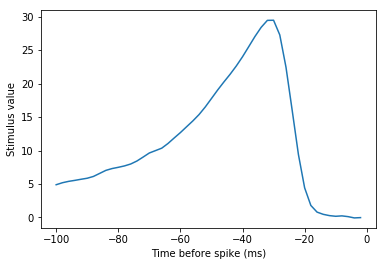

In [45]:
### QUESTION 3

import matplotlib.pyplot as plt

def calc_sta(spike_train, stimulus):
    S = [0] * 50
    num_spikes = 0
    
    for index, spike in enumerate(spike_train):
        if (index > 50 and spike == 1):
            num_spikes += 1
            for i in range(0, 50):
                S[49 - i] += stimulus[index - i]
                
    STA = [s / num_spikes for s in S]
    x = [i for i in range(-100, 0) if i%2 == 0]
    
    plt.plot(x, STA)
    plt.xlabel("Time before spike (ms)")
    plt.ylabel("Stimulus value")
    plt.savefig('sta.png')
    plt.show()
    

def load_data(filename,T):
    data_array = [T(line.strip()) for line in open(filename, 'r')]
    return data_array

spike_train = load_data("rho.dat", int)

stimulus = load_data("stim.dat",float)

calc_sta(spike_train, stimulus)

